In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import pandas as pd
import numpy as np  
from scipy.stats import rankdata
from scipy import stats
from scipy.integrate import trapezoid
import sys

In [2]:
# Might be ideal to have the actual data - we don't have that as its stuck on BR200. But ... could rerun and use that. 
# But for now will jsut use the cell data and will get get the pulsese later.     

## Analysis of apoptosis across multiple intervention pulse widths: Lets begin

By introducing the apoptotic agents in a single, short pulse, we can observe differences in the efficacy of putatively equivalent interventions (See Cell Fate Analysis T-LGL Model notebook). Some interventions work only when applied for an exceptionally long duration.

### Load and process live cell data

This model includes only one population - so we extracted the live cells from each simulation time output. This data was placed in a CSV file. 

Here we load this into a dataframe, get the mean for the replicate runs, and finally plot all time courses. 

In [3]:
df_raw = pd.read_csv('../dataframes/aggregated_live_cells_time.csv', index_col=0)
df_raw.head()

,0.0,12.0,24.0,36.0,48.0,60.0,72.0,84.0,96.0,108.0,...,7812.0,7824.0,7836.0,7848.0,7860.0,7872.0,7884.0,7896.0,7908.0,7920.0
intervention,,,,,,,,,,,,,,,,,,,,,
EG_Ceramide_S1P_1_11,1500,1506,1507,1509,1509,1511,1516,1518,1522,1522,...,397,397,397,397,396,395,393,392,392,391
EG_Ceramide_S1P_1_12,1500,1503,1503,1507,1510,1511,1514,1515,1517,1518,...,383,381,377,376,376,375,374,372,373,374
EG_Ceramide_S1P_1_13,1500,1500,1503,1504,1506,1507,1511,1514,1514,1515,...,337,337,336,336,335,335,333,332,329,326
EG_Ceramide_S1P_1_21,1500,1503,1504,1505,1506,1507,1507,1509,1511,1511,...,0,0,0,0,0,0,0,0,0,0
EG_Ceramide_S1P_1_22,1500,1501,1502,1504,1506,1509,1509,1509,1509,1513,...,5,5,5,5,5,5,5,5,5,5


We will mainly be using the transpose of `raw` so lets transpose it. 

In [4]:
df = df_raw.transpose()
df.head(100)

intervention,EG_Ceramide_S1P_1_11,EG_Ceramide_S1P_1_12,EG_Ceramide_S1P_1_13,EG_Ceramide_S1P_1_21,EG_Ceramide_S1P_1_22,EG_Ceramide_S1P_1_23,EG_Ceramide_S1P_1_31,EG_Ceramide_S1P_1_32,EG_Ceramide_S1P_1_33,EG_GAP_RAS_1_11,...,SM_pro_Ceramidepro_RAS_33,SM_pro_TBETpro_Ceramidepro_ERK_11,SM_pro_TBETpro_Ceramidepro_ERK_12,SM_pro_TBETpro_Ceramidepro_ERK_13,SM_pro_TBETpro_Ceramidepro_ERK_21,SM_pro_TBETpro_Ceramidepro_ERK_22,SM_pro_TBETpro_Ceramidepro_ERK_23,SM_pro_TBETpro_Ceramidepro_ERK_31,SM_pro_TBETpro_Ceramidepro_ERK_32,SM_pro_TBETpro_Ceramidepro_ERK_33
0.0,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,...,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500
12.0,1506,1503,1500,1503,1501,1502,1500,1502,1502,1500,...,1500,1500,1504,1501,1502,1500,1501,1501,1503,1504
24.0,1507,1503,1503,1504,1502,1502,1500,1502,1504,1501,...,1501,1501,1507,1504,1502,1502,1503,1504,1503,1506
36.0,1509,1507,1504,1505,1504,1504,1501,1503,1504,1503,...,1507,1503,1510,1505,1503,1503,1505,1506,1503,1508
48.0,1509,1510,1506,1506,1506,1508,1501,1504,1507,1503,...,1510,1504,1511,1505,1503,1504,1505,1507,1507,1509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140.0,1344,1373,1369,824,880,833,844,805,829,1599,...,644,1342,1291,1338,692,664,688,696,675,696
1152.0,1342,1368,1367,814,870,823,836,798,820,1599,...,634,1336,1288,1336,684,661,679,689,669,685
1164.0,1342,1365,1364,806,864,817,823,787,810,1601,...,631,1330,1291,1335,680,659,672,679,658,681
1176.0,1341,1363,1359,800,851,811,813,780,800,1604,...,625,1332,1289,1337,672,655,665,674,652,678


Now we have something to plot! Lets chck them out!!

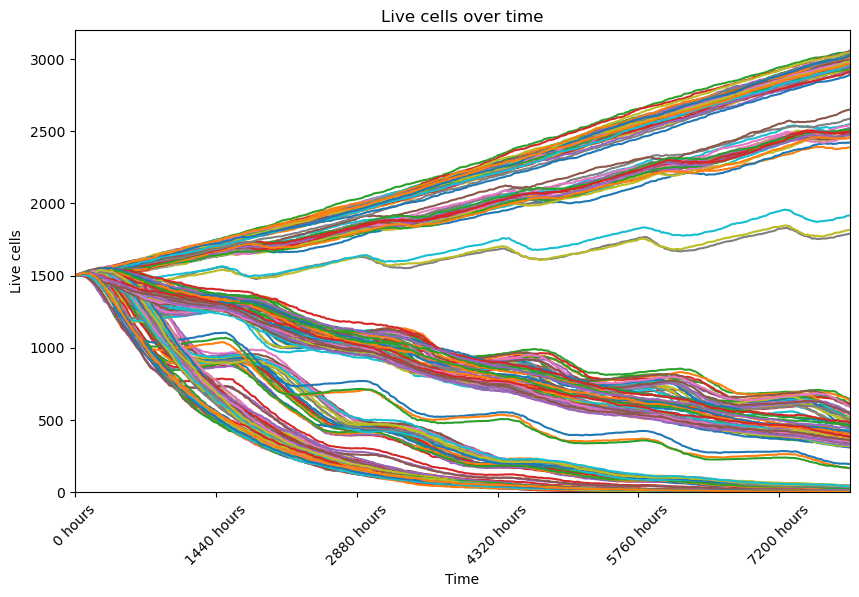

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

for intervention in df:
    plt.plot(df.index, df[intervention])

plt.title('Live cells over time')
plt.xlabel('Time')
plt.ylabel('Live cells')
plt.ylim(0, 3200)
plt.xlim(0, df.index[-1])
ticks = np.arange(0, len(df.index), 120)
plt.xticks(ticks, rotation=45)

# Use set_major_formatter to format ticks as hours

def fmt_index_to_hours(x, pos):
    x = x * 12 # 12 minutes per index
    return f'{x:.0f} hours'

ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))
plt.show()

### Add in above threshold shading.
Lets add when the substrates are above the thresholds - this is coming from the decay equation. 

Substrates are introduce uniformly across the domain - and begin to decay immediately. Cells have a 0.5 threshold for activation of the intervention node (the node that begins to alter dynamcis of the otherwise steady state Boolean network). We tested 3 decay rates, resulting in three durations of time above threshold. 

- Fast decay (short pulse): 0.0116 1/min
- Medium decay (medium pulse): 0.00192 1/min
- Slow decay (long pulse): 0.000963 1/min

Correspondingly, each substrate above threshold time (pulse width) is:

- 1 hour
- 6 hours
- 12 hours


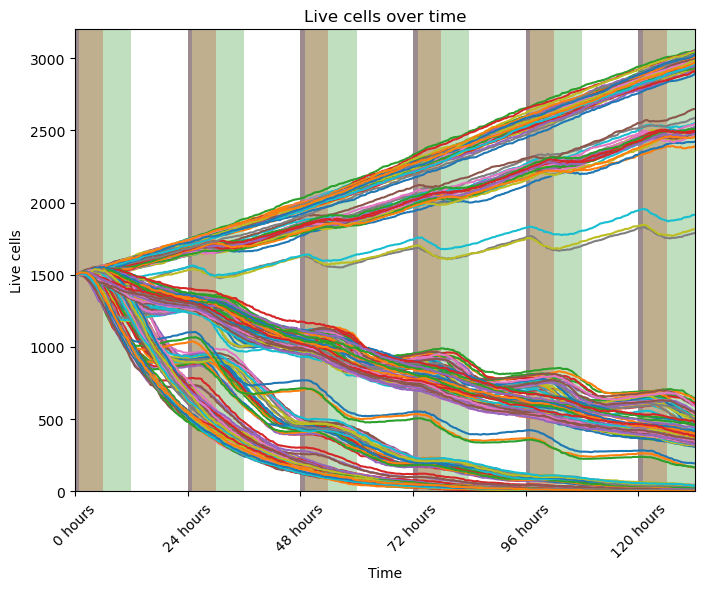

In [6]:

fig, ax = plt.subplots(figsize=(8, 6))

for intervention in df:
    plt.plot(df.index, df[intervention])

plt.title('Live cells over time')
plt.xlabel('Time')
plt.ylabel('Live cells')
plt.ylim(0, 3200)
plt.xlim(0, df.index[-1])
ticks = np.arange(0, len(df.index), 120)
plt.xticks(ticks, rotation=45)

# Use set_major_formatter to format ticks as hours

def fmt_index_to_hours(x, pos):
    x = x * 12/60 # 12 minutes per index
    return f'{x:.0f} hours'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))

# Highlighting the time period from 15.12.2022 to 1.01.2023 and customizing the shaded area
# plt.axvspan(0, 5, facecolor='yellow', alpha=0.5, hatch='/', edgecolor='red', linewidth=5)

# put these in a loop to color code the different time periods - every 24 hours.
for tick in ticks:
    plt.axvspan(tick, tick+5, facecolor='blue', alpha=0.25, linewidth=5)
    plt.axvspan(tick, tick+30, facecolor='red', alpha=0.25, linewidth=5)
    plt.axvspan(tick, tick+60, facecolor='green', alpha=0.25, linewidth=5)

plt.show()



### Get means and replot

We did these results in triplicate. The data is organized in bunchs of 3 (last digit of the name holds the replicate number) - so we take advantage of this and just average in sets of three. 

In [7]:
# Create a new DataFrame to store the averaged values

df_avg = pd.DataFrame()

# Process columns in steps of three
for i in range(0, len(df.columns), 3):
    # The base name for the averaged column can be derived from the first of each three columns,
    # removing the last digit and the underscore immediately preceding it.
    # This needs fixed - jsut need to remove the last digit
    base_name = df.columns[i][:-1]  # Remove only the last character (replicate number)
    # print(base_name)
    
    # Select the three replicate columns
    replicate_cols = df.iloc[:, i:i+3]
    # print(replicate_cols)
    
    # Calculate the average of these columns
    df_avg[base_name] = replicate_cols.mean(axis=1)

print(df_avg.shape)
df_avg.tail()

(661, 84)


,EG_Ceramide_S1P_1_1,EG_Ceramide_S1P_1_2,EG_Ceramide_S1P_1_3,EG_GAP_RAS_1_1,EG_GAP_RAS_1_2,EG_GAP_RAS_1_3,EG_IL15_GAP_0_1,EG_IL15_GAP_0_2,EG_IL15_GAP_0_3,EG_IL2RBT_IL2RB_0_1,...,SM_pro_Ceramidepro_PI3Kpro_ERK_3,SM_pro_Ceramidepro_PI3Kpro_MEK_1,SM_pro_Ceramidepro_PI3Kpro_MEK_2,SM_pro_Ceramidepro_PI3Kpro_MEK_3,SM_pro_Ceramidepro_RAS_1,SM_pro_Ceramidepro_RAS_2,SM_pro_Ceramidepro_RAS_3,SM_pro_TBETpro_Ceramidepro_ERK_1,SM_pro_TBETpro_Ceramidepro_ERK_2,SM_pro_TBETpro_Ceramidepro_ERK_3
7872.0,368.333333,3.000000,1.666667,2456.333333,610.666667,41.000000,2459.333333,634.333333,39.666667,2516.000000,...,2.0,349.333333,0.333333,0.666667,352.000000,2.0,1.666667,361.333333,3.666667,1.0
7884.0,366.666667,3.000000,1.666667,2456.666667,607.666667,40.666667,2459.666667,630.333333,39.666667,2519.000000,...,2.0,348.333333,0.333333,0.666667,352.000000,2.0,1.666667,361.000000,3.666667,1.0
7896.0,365.333333,2.666667,1.666667,2457.666667,604.333333,40.333333,2462.333333,626.666667,39.333333,2520.333333,...,2.0,346.666667,0.333333,0.666667,350.333333,2.0,1.666667,360.666667,4.000000,1.0
7908.0,364.666667,2.666667,1.666667,2458.666667,600.333333,40.666667,2463.000000,623.666667,39.000000,2522.333333,...,2.0,345.000000,0.333333,0.666667,349.666667,2.0,1.666667,358.666667,4.000000,1.0
7920.0,363.666667,2.666667,1.666667,2459.333333,598.333333,40.333333,2465.666667,621.000000,39.000000,2524.666667,...,2.0,343.333333,0.333333,0.666667,347.000000,2.0,1.666667,357.666667,4.000000,1.0


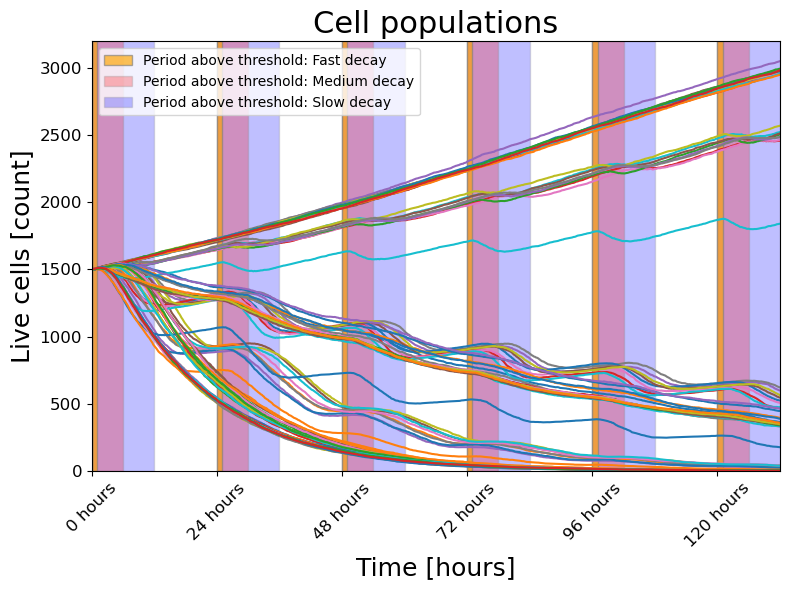

In [8]:

fig, ax = plt.subplots(figsize=(8, 6))

for intervention in df_avg:
    plt.plot(df_avg.index, df_avg[intervention])

plt.title('Cell populations', fontsize=22)
plt.xlabel('Time [hours]', fontsize=18)
plt.ylabel('Live cells [count]', fontsize=18)
plt.xlim(0, df_avg.index[-1])
plt.ylim(0, 3200)
ticks = np.arange(0, len(df_avg.index), 120)
plt.xticks(ticks, rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Use set_major_formatter to format ticks as hours

def fmt_index_to_hours(x, pos):
    x = x * 12/60 # 12 minutes per index
    return f'{x:.0f} hours'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))

# Highlighting the time period from 15.12.2022 to 1.01.2023 and customizing the shaded area
# plt.axvspan(0, 5, facecolor='yellow', alpha=0.5, hatch='/', edgecolor='red', linewidth=5)

# put these in a loop to color code the different time periods - every 24 hours.
for tick in ticks:

    plt.axvspan(tick, tick+60, facecolor='blue', alpha=0.25, edgecolor='grey', linewidth=1)
    plt.axvspan(tick, tick+30, facecolor='red', alpha=0.25, edgecolor='grey', linewidth=1)
    plt.axvspan(tick, tick+5, facecolor='orange', alpha=0.66, edgecolor='grey', linewidth=1)

##### WARNING - THIS ORDER IS (PROPOSEFULLY) REVERSED FROM ABOVE!!!!!!
plt.axvspan(0, 0, facecolor='orange', alpha=0.66, label='Period above threshold: Fast decay', edgecolor='grey', linewidth=1)
plt.axvspan(0, 0, facecolor='red', alpha=0.25, label='Period above threshold: Medium decay', edgecolor='grey', linewidth=1)
plt.axvspan(0, 0, facecolor='blue', alpha=0.25, label='Period above threshold: Slow decay', edgecolor='grey', linewidth=1)


plt.legend()
plt.tight_layout()
plt.show()

### GREAT! Lets break this down more. Split out by category.

We have 9 categories:

Decay lengths:
- Slow decay
- Medium decay
- Fasts decay

Target control algorithm:
- Egdetic control (EG)
- IBMFA (IB)
- Stable motifs

Lets separate them out - then jsut make all 9.


Make the transpose - to use its index

In [9]:
df_avg_transpose = df_avg.transpose()
df_avg_transpose.head()

,0.0,12.0,24.0,36.0,48.0,60.0,72.0,84.0,96.0,108.0,...,7812.0,7824.0,7836.0,7848.0,7860.0,7872.0,7884.0,7896.0,7908.0,7920.0
EG_Ceramide_S1P_1_1,1500.0,1503.000000,1504.333333,1506.666667,1508.333333,1509.666667,1513.666667,1515.666667,1517.666667,1518.333333,...,372.333333,371.666667,370.000000,369.666667,369.000000,368.333333,366.666667,365.333333,364.666667,363.666667
EG_Ceramide_S1P_1_2,1500.0,1502.000000,1502.666667,1504.333333,1506.666667,1508.666667,1508.666667,1510.000000,1512.333333,1513.666667,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.666667,2.666667,2.666667
EG_Ceramide_S1P_1_3,1500.0,1501.333333,1502.000000,1502.666667,1504.000000,1505.333333,1507.333333,1508.333333,1510.000000,1511.666667,...,2.000000,1.666667,1.666667,1.666667,1.666667,1.666667,1.666667,1.666667,1.666667,1.666667
EG_GAP_RAS_1_1,1500.0,1500.333333,1502.333333,1504.666667,1504.666667,1506.000000,1509.000000,1511.333333,1512.666667,1513.666667,...,2456.333333,2456.333333,2456.666667,2455.333333,2455.333333,2456.333333,2456.666667,2457.666667,2458.666667,2459.333333
EG_GAP_RAS_1_2,1500.0,1501.000000,1502.333333,1504.666667,1506.000000,1507.333333,1509.666667,1512.000000,1514.000000,1516.666667,...,630.333333,628.000000,625.000000,619.666667,614.000000,610.666667,607.666667,604.333333,600.333333,598.333333


Make categories dataframe - getting the algorithm and decay

In [104]:
df_categories = pd.DataFrame(index=df_avg_transpose.index)

# Need to split index into a name. For the EGs, the name will be the second and third elements connected by a right arrow. Then an "=" and the second to last element. 
# for the others we have "pro" and "anti". These are node level interventions. We need it to be "Node=pro" or "Node=anti", where pro is 1 and anti is 0.
# The biggest issue is that the non-EGs are not split by an underscore. So we need to do some string matching to get the right values. In particular, 
# the nodes of some are right next to the "pro" or "anti" and some are not.
# Not completely handled - but working for now. 


for index in df_avg_transpose.index:
    split_index = index.split('_', 10)
    # print(split_index)
    if split_index[0] == 'EG':
        df_categories.loc[index, 'intervention_name'] = f'{split_index[1]}' + r'$\rightarrow$' + f'{split_index[2]}' + '$=$' + f'{split_index[-2]}'
    
    # ASSUMES ONLY SINGLE NODE INTERVENTIONS FOR IB!!!!!!!!
    elif split_index[0] == 'IB':
        if split_index[1] == 'pro':
            df_categories.loc[index, 'intervention_name'] = f'{split_index[2]}=1'
        else:
            df_categories.loc[index, 'intervention_name'] = f'{split_index[2]}=0'
    # the final category includes having the node name right next to the pro or anti. How do we pull the pro or anti out?
    # Will have to do some substring matching/searching to find them
    else:
        if len(split_index) < 5:
            if 'pro' in split_index[1]:
                df_categories.loc[index, 'intervention_name'] = f'{split_index[2]}=1'
            else:
                df_categories.loc[index, 'intervention_name'] = f'{split_index[2]}=0'
        # This handles the ones iwth multiple nodes. Its a bit of a mess. It can be generalized, probably, but the easiest fix is to change out how the names output. 
        else:
            if len(split_index) == 5:
                for item in split_index[1:]:
                    if 'pro' in split_index[1]:
                        temp = split_index[2].replace('pro', '')
                        temp_str = f'{temp}=1, '
                    if 'pro' in split_index[2]:
                        temp_str += f'{split_index[3]}=1'
                df_categories.loc[index, 'intervention_name'] = temp_str
            else:
                if 'pro' in split_index[1]:
                    temp = split_index[2].replace('pro', '')
                    temp_str = f'{temp}=1, '
                if 'pro' in split_index[2]:
                    temp = split_index[3].replace('pro', '')
                    temp_str += f'{temp}=1, '
                if 'pro' in split_index[3]:
                    temp_str += f'{split_index[4]}=1'
                df_categories.loc[index, 'intervention_name'] = temp_str

                    


for index in df_avg_transpose.index:
    split_index = index.split('_', 10)
    df_categories.loc[index, 'algorithm'] = split_index[0]
    df_categories.loc[index, 'decay'] = split_index[-1]
    # df_temp.loc[index, 'type'] = split_index[-2] # this would involve string matching to really do right (pro = 1, anti=0)


df_categories.head(200)

,intervention_name,algorithm,decay
EG_Ceramide_S1P_1_1,Ceramide$\rightarrow$S1P$=$1,EG,1
EG_Ceramide_S1P_1_2,Ceramide$\rightarrow$S1P$=$1,EG,2
EG_Ceramide_S1P_1_3,Ceramide$\rightarrow$S1P$=$1,EG,3
EG_GAP_RAS_1_1,GAP$\rightarrow$RAS$=$1,EG,1
EG_GAP_RAS_1_2,GAP$\rightarrow$RAS$=$1,EG,2
...,...,...,...
SM_pro_Ceramidepro_RAS_2,"Ceramide=1, RAS=1",SM,2
SM_pro_Ceramidepro_RAS_3,"Ceramide=1, RAS=1",SM,3
SM_pro_TBETpro_Ceramidepro_ERK_1,"TBET=1, Ceramide=1, ERK=1",SM,1
SM_pro_TBETpro_Ceramidepro_ERK_2,"TBET=1, Ceramide=1, ERK=1",SM,2


Then we dfs with column names corresponding to the column names in df_average split by decay type, intervention type, and both.

We could assemble a nice plot of all of these or subsets ifwe wanted to. I'll ... just plot them singly for right now. But could do subplots to get comparisions as needed. 

In [105]:
df_short_decay = df_categories[df_categories.decay == '1'].transpose()

df_medium_decay = df_categories[df_categories.decay == '2'].transpose()

df_long_decay = df_categories[df_categories.decay == '3'].transpose()

df_EG = df_categories[df_categories.algorithm == 'EG'].transpose()

df_IB = df_categories[df_categories.algorithm == 'IB'].transpose()

df_SM = df_categories[df_categories.algorithm == 'SM'].transpose()

### Short, medium, and long decay

I'll split each off in its own plat

SHORT

In [91]:
# fig, ax = plt.subplots(figsize=(8, 6))

# for intervention in df_short_decay:
#     plt.plot(df_avg.index, df_avg[intervention])

# plt.title('Short Decay Only: Cell populations', fontsize=22)
# plt.xlabel('Time [hours]', fontsize=18)
# plt.ylabel('Live cells [count]', fontsize=18)
# plt.xlim(0, df_avg.index[-1])
# plt.ylim(0, 3200)
# ticks = np.arange(0, len(df_avg.index), 120)
# plt.xticks(ticks, rotation=45, fontsize=12)
# plt.yticks(fontsize=12)

# # Use set_major_formatter to format ticks as hours

# def fmt_index_to_hours(x, pos):
#     x = x * 12/60 # 12 minutes per index
#     return f'{x:.0f} hours'
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))

# # Highlighting the time period from 15.12.2022 to 1.01.2023 and customizing the shaded area
# # plt.axvspan(0, 5, facecolor='yellow', alpha=0.5, hatch='/', edgecolor='red', linewidth=5)

# # put these in a loop to color code the different time periods - every 24 hours.
# for tick in ticks:

#     # plt.axvspan(tick, tick+60, facecolor='blue', alpha=0.25, edgecolor='grey', linewidth=1)
#     # plt.axvspan(tick, tick+30, facecolor='red', alpha=0.25, edgecolor='grey', linewidth=1)
#     plt.axvspan(tick, tick+5, facecolor='orange', alpha=0.66, edgecolor='grey', linewidth=1)

# ##### WARNING - THIS ORDER IS (PROPOSEFULLY) REVERSED FROM ABOVE!!!!!!
# plt.axvspan(0, 0, facecolor='orange', alpha=0.66, label='Period above threshold: Fast decay', edgecolor='grey', linewidth=1)
# # plt.axvspan(0, 0, facecolor='red', alpha=0.25, label='Period above threshold: Medium decay', edgecolor='grey', linewidth=1)
# # plt.axvspan(0, 0, facecolor='blue', alpha=0.25, label='Period above threshold: Slow decay', edgecolor='grey', linewidth=1)


# plt.legend()
# plt.tight_layout()
# plt.show()

MEDIUM

In [92]:
# fig, ax = plt.subplots(figsize=(8, 6))

# for intervention in df_medium_decay:
#     plt.plot(df_avg.index, df_avg[intervention])

# plt.title('Medium Decay Only: Cell populations', fontsize=22)
# plt.xlabel('Time [hours]', fontsize=18)
# plt.ylabel('Live cells [count]', fontsize=18)
# plt.xlim(0, df_avg.index[-1])
# plt.ylim(0, 3200)
# ticks = np.arange(0, len(df_avg.index), 120)
# plt.xticks(ticks, rotation=45, fontsize=12)
# plt.yticks(fontsize=12)

# # Use set_major_formatter to format ticks as hours

# def fmt_index_to_hours(x, pos):
#     x = x * 12/60 # 12 minutes per index
#     return f'{x:.0f} hours'
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))

# # Highlighting the time period from 15.12.2022 to 1.01.2023 and customizing the shaded area
# # plt.axvspan(0, 5, facecolor='yellow', alpha=0.5, hatch='/', edgecolor='red', linewidth=5)

# # put these in a loop to color code the different time periods - every 24 hours.
# for tick in ticks:

#     # plt.axvspan(tick, tick+60, facecolor='blue', alpha=0.25, edgecolor='grey', linewidth=1)
#     plt.axvspan(tick, tick+30, facecolor='red', alpha=0.25, edgecolor='grey', linewidth=1)
#     # plt.axvspan(tick, tick+5, facecolor='orange', alpha=0.66, edgecolor='grey', linewidth=1)

# ##### WARNING - THIS ORDER IS (PROPOSEFULLY) REVERSED FROM ABOVE!!!!!!
# # plt.axvspan(0, 0, facecolor='orange', alpha=0.66, label='Period above threshold: Fast decay', edgecolor='grey', linewidth=1)
# plt.axvspan(0, 0, facecolor='red', alpha=0.25, label='Period above threshold: Medium decay', edgecolor='grey', linewidth=1)
# # plt.axvspan(0, 0, facecolor='blue', alpha=0.25, label='Period above threshold: Slow decay', edgecolor='grey', linewidth=1)


# plt.legend()
# plt.tight_layout()
# plt.show()

In [93]:
# fig, ax = plt.subplots(figsize=(8, 6))

# for intervention in df_long_decay:
#     plt.plot(df_avg.index, df_avg[intervention])

# plt.title('Slow Decay Only: Cell populations', fontsize=22)
# plt.xlabel('Time [hours]', fontsize=18)
# plt.ylabel('Live cells [count]', fontsize=18)
# plt.xlim(0, df_avg.index[-1])
# plt.ylim(0, 3200)
# ticks = np.arange(0, len(df_avg.index), 120)
# plt.xticks(ticks, rotation=45, fontsize=12)
# plt.yticks(fontsize=12)

# # Use set_major_formatter to format ticks as hours

# def fmt_index_to_hours(x, pos):
#     x = x * 12/60 # 12 minutes per index
#     return f'{x:.0f} hours'
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))

# # Highlighting the time period from 15.12.2022 to 1.01.2023 and customizing the shaded area
# # plt.axvspan(0, 5, facecolor='yellow', alpha=0.5, hatch='/', edgecolor='red', linewidth=5)

# # put these in a loop to color code the different time periods - every 24 hours.
# for tick in ticks:

#     plt.axvspan(tick, tick+60, facecolor='blue', alpha=0.25, edgecolor='grey', linewidth=1)
#     # plt.axvspan(tick, tick+30, facecolor='red', alpha=0.25, edgecolor='grey', linewidth=1)
#     # plt.axvspan(tick, tick+5, facecolor='orange', alpha=0.66, edgecolor='grey', linewidth=1)

# ##### WARNING - THIS ORDER IS (PROPOSEFULLY) REVERSED FROM ABOVE!!!!!!
# # plt.axvspan(0, 0, facecolor='orange', alpha=0.66, label='Period above threshold: Fast decay', edgecolor='grey', linewidth=1)
# # plt.axvspan(0, 0, facecolor='red', alpha=0.25, label='Period above threshold: Medium decay', edgecolor='grey', linewidth=1)
# plt.axvspan(0, 0, facecolor='blue', alpha=0.25, label='Period above threshold: Slow decay', edgecolor='grey', linewidth=1)


# plt.legend()
# plt.tight_layout()
# plt.show()

EGDETIC

In [94]:

# fig, ax = plt.subplots(figsize=(8, 6))

# for intervention in df_EG:
#     plt.plot(df_avg.index, df_avg[intervention])

# plt.title('Egdetic only: Cell populations', fontsize=22)
# plt.xlabel('Time [hours]', fontsize=18)
# plt.ylabel('Live cells [count]', fontsize=18)
# plt.xlim(0, df_avg.index[-1])
# plt.ylim(0, 3200)
# ticks = np.arange(0, len(df_avg.index), 120)
# plt.xticks(ticks, rotation=45, fontsize=12)
# plt.yticks(fontsize=12)

# # Use set_major_formatter to format ticks as hours

# def fmt_index_to_hours(x, pos):
#     x = x * 12/60 # 12 minutes per index
#     return f'{x:.0f} hours'
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))

# # Highlighting the time period from 15.12.2022 to 1.01.2023 and customizing the shaded area
# # plt.axvspan(0, 5, facecolor='yellow', alpha=0.5, hatch='/', edgecolor='red', linewidth=5)

# # put these in a loop to color code the different time periods - every 24 hours.
# for tick in ticks:

#     plt.axvspan(tick, tick+60, facecolor='blue', alpha=0.25, edgecolor='grey', linewidth=1)
#     plt.axvspan(tick, tick+30, facecolor='red', alpha=0.25, edgecolor='grey', linewidth=1)
#     plt.axvspan(tick, tick+5, facecolor='orange', alpha=0.66, edgecolor='grey', linewidth=1)

# ##### WARNING - THIS ORDER IS (PROPOSEFULLY) REVERSED FROM ABOVE!!!!!!
# plt.axvspan(0, 0, facecolor='orange', alpha=0.66, label='Period above threshold: Fast decay', edgecolor='grey', linewidth=1)
# plt.axvspan(0, 0, facecolor='red', alpha=0.25, label='Period above threshold: Medium decay', edgecolor='grey', linewidth=1)
# plt.axvspan(0, 0, facecolor='blue', alpha=0.25, label='Period above threshold: Slow decay', edgecolor='grey', linewidth=1)


# plt.legend()
# plt.tight_layout()
# plt.show()

IBMFA!

In [95]:

# fig, ax = plt.subplots(figsize=(8, 6))

# for intervention in df_IB:
#     plt.plot(df_avg.index, df_avg[intervention])

# plt.title('IBMFA only: Cell populations', fontsize=22)
# plt.xlabel('Time [hours]', fontsize=18)
# plt.ylabel('Live cells [count]', fontsize=18)
# plt.xlim(0, df_avg.index[-1])
# plt.ylim(0, 3200)
# ticks = np.arange(0, len(df_avg.index), 120)
# plt.xticks(ticks, rotation=45, fontsize=12)
# plt.yticks(fontsize=12)

# # Use set_major_formatter to format ticks as hours

# def fmt_index_to_hours(x, pos):
#     x = x * 12/60 # 12 minutes per index
#     return f'{x:.0f} hours'
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))

# # Highlighting the time period from 15.12.2022 to 1.01.2023 and customizing the shaded area
# # plt.axvspan(0, 5, facecolor='yellow', alpha=0.5, hatch='/', edgecolor='red', linewidth=5)

# # put these in a loop to color code the different time periods - every 24 hours.
# for tick in ticks:

#     plt.axvspan(tick, tick+60, facecolor='blue', alpha=0.25, edgecolor='grey', linewidth=0.5)
#     plt.axvspan(tick, tick+30, facecolor='red', alpha=0.25, edgecolor='grey', linewidth=0.5)
#     plt.axvspan(tick, tick+5, facecolor='orange', alpha=0.66, edgecolor='grey', linewidth=0.5)

# ##### WARNING - THIS ORDER IS (PROPOSEFULLY) REVERSED FROM ABOVE!!!!!!
# plt.axvspan(0, 0, facecolor='orange', alpha=0.66, label='Period above threshold: Fast decay', edgecolor='grey', linewidth=1)
# plt.axvspan(0, 0, facecolor='red', alpha=0.25, label='Period above threshold: Medium decay', edgecolor='grey', linewidth=1)
# plt.axvspan(0, 0, facecolor='blue', alpha=0.25, label='Period above threshold: Slow decay', edgecolor='grey', linewidth=1)


# plt.legend()
# plt.tight_layout()
# plt.show()

In [96]:

# fig, ax = plt.subplots(figsize=(8, 6))

# for intervention in df_SM:
#     plt.plot(df_avg.index, df_avg[intervention])

# plt.title('Stable motif only: Cell populations', fontsize=22)
# plt.xlabel('Time [hours]', fontsize=18)
# plt.ylabel('Live cells [count]', fontsize=18)
# plt.xlim(0, df_avg.index[-1])
# plt.ylim(0, 3200)
# ticks = np.arange(0, len(df.index), 120)
# plt.xticks(ticks, rotation=45, fontsize=12)
# plt.yticks(fontsize=12)

# # Use set_major_formatter to format ticks as hours

# def fmt_index_to_hours(x, pos):
#     x = x * 12/60 # 12 minutes per index
#     return f'{x:.0f} hours'
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))

# # Highlighting the time period from 15.12.2022 to 1.01.2023 and customizing the shaded area
# # plt.axvspan(0, 5, facecolor='yellow', alpha=0.5, hatch='/', edgecolor='red', linewidth=5)

# # put these in a loop to color code the different time periods - every 24 hours.
# for tick in ticks:

#     plt.axvspan(tick, tick+60, facecolor='blue', alpha=0.25, edgecolor='grey', linewidth=0.5)
#     plt.axvspan(tick, tick+30, facecolor='red', alpha=0.25, edgecolor='grey', linewidth=0.5)
#     plt.axvspan(tick, tick+5, facecolor='orange', alpha=0.66, edgecolor='grey', linewidth=0.5)

# ##### WARNING - THIS ORDER IS (PROPOSEFULLY) REVERSED FROM ABOVE!!!!!!
# plt.axvspan(0, 0, facecolor='orange', alpha=0.66, label='Period above threshold: Fast decay', edgecolor='grey', linewidth=1)
# plt.axvspan(0, 0, facecolor='red', alpha=0.25, label='Period above threshold: Medium decay', edgecolor='grey', linewidth=1)
# plt.axvspan(0, 0, facecolor='blue', alpha=0.25, label='Period above threshold: Slow decay', edgecolor='grey', linewidth=1)


# plt.legend()
# plt.tight_layout()
# plt.show()

### Now we will break it down ALL the WAY!

Each category will get its own dataframe and plot

In [106]:
df_fast_EG = df_categories[(df_categories.decay == '1') & (df_categories.algorithm == 'EG')].transpose()

df_medium_EG = df_categories[(df_categories.decay == '2') & (df_categories.algorithm == 'EG')].transpose()

df_slow_EG = df_categories[(df_categories.decay == '3') & (df_categories.algorithm == 'EG')].transpose()

df_fast_IB = df_categories[(df_categories.decay == '1') & (df_categories.algorithm == 'IB')].transpose()

df_medium_IB = df_categories[(df_categories.decay == '2') & (df_categories.algorithm == 'IB')].transpose()

df_slow_IB = df_categories[(df_categories.decay == '3') & (df_categories.algorithm == 'IB')].transpose()

df_fast_SM = df_categories[(df_categories.decay == '1') & (df_categories.algorithm == 'SM')].transpose()

df_medium_SM = df_categories[(df_categories.decay == '2') & (df_categories.algorithm == 'SM')].transpose()

df_slow_SM = df_categories[(df_categories.decay == '3') & (df_categories.algorithm == 'SM')].transpose()

Lets make a dicitonary of these!!!

In [107]:
individual_categories = {}
individual_categories = {'df_Fast_EG': df_fast_EG, 'df_Medium_EG': df_medium_EG, 'df_Slow_EG': df_slow_EG, 'df_Fast_IB': df_fast_IB, 
                         'df_Medium_IB': df_medium_IB, 'df_Slow_IB': df_slow_IB, 'df_Fast_SM': df_fast_SM, 'df_Medium_SM': df_medium_SM, 'df_Slow_SM': df_slow_SM}

In [108]:
for key in individual_categories:
    print(key.split('_'))

['df', 'Fast', 'EG']
['df', 'Medium', 'EG']
['df', 'Slow', 'EG']
['df', 'Fast', 'IB']
['df', 'Medium', 'IB']
['df', 'Slow', 'IB']
['df', 'Fast', 'SM']
['df', 'Medium', 'SM']
['df', 'Slow', 'SM']


In [109]:
def plot_category(df_name, df, df_avg):
    split_category_name = df_name.split('_')
    title = f'{split_category_name[1]} Decay {split_category_name[2]} Only: Cell populations'
    fig, ax = plt.subplots(figsize=(8, 6))

    for intervention in df:
        plt.plot(df_avg.index, df_avg[intervention])

    plt.title(title, fontsize=22)
    plt.xlabel('Time [hours]', fontsize=18)
    plt.ylabel('Live cells [count]', fontsize=18)
    plt.xlim(0, df_avg.index[-1])
    plt.ylim(0, 3200)
    ticks = np.arange(0, len(df_avg.index), 120)
    plt.xticks(ticks, rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    # Use set_major_formatter to format ticks as hours

    def fmt_index_to_hours(x, pos):
        x = x * 12/60 # 12 minutes per index
        return f'{x:.0f} hours'
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))

    # Highlighting the time period from 15.12.2022 to 1.01.2023 and customizing the shaded area
    # plt.axvspan(0, 5, facecolor='yellow', alpha=0.5, hatch='/', edgecolor='red', linewidth=5)

    # put these in a loop to color code the different time periods - every 24 hours.
    for tick in ticks:
        if split_category_name[1] == 'Fast':
            plt.axvspan(tick, tick+5, facecolor='orange', alpha=0.66, edgecolor='grey', linewidth=1)
        elif split_category_name[1] == 'Medium':
            plt.axvspan(tick, tick+30, facecolor='red', alpha=0.25, edgecolor='grey', linewidth=1)
        elif split_category_name[1] == 'Slow':
            plt.axvspan(tick, tick+60, facecolor='blue', alpha=0.25, edgecolor='grey', linewidth=1)
        # plt.axvspan(tick, tick+60, facecolor='blue', alpha=0.25, edgecolor='grey', linewidth=1)
        # plt.axvspan(tick, tick+30, facecolor='red', alpha=0.25, edgecolor='grey', linewidth=1)
        # plt.axvspan(tick, tick+5, facecolor='orange', alpha=0.66, edgecolor='grey', linewidth=1)

    ##### WARNING - THIS ORDER IS (PROPOSEFULLY) REVERSED FROM ABOVE!!!!!!
    if split_category_name[1] == 'Fast':
        plt.axvspan(0, 0, facecolor='orange', alpha=0.66, label='Period above threshold: Fast decay', edgecolor='grey', linewidth=1)
    elif split_category_name[1] == 'Medium':
        plt.axvspan(0, 0, facecolor='red', alpha=0.25, label='Period above threshold: Medium decay', edgecolor='grey', linewidth=1)
    elif split_category_name[1] == 'Slow':
        plt.axvspan(0, 0, facecolor='blue', alpha=0.25, label='Period above threshold: Slow decay', edgecolor='grey', linewidth=1)
    # plt.axvspan(0, 0, facecolor='orange', alpha=0.66, label='Period above threshold: Fast decay', edgecolor='grey', linewidth=1)
    # plt.axvspan(0, 0, facecolor='red', alpha=0.25, label='Period above threshold: Medium decay', edgecolor='grey', linewidth=1)
    # plt.axvspan(0, 0, facecolor='blue', alpha=0.25, label='Period above threshold: Slow decay', edgecolor='grey', linewidth=1)


    plt.legend()
    plt.tight_layout()
    plt.show()

In [110]:
# for category_name in individual_categories:
#     plot_category(category_name, individual_categories[category_name], df_avg)

## Lets make this an array ... 

In [111]:
def plot_category_array(df_name: str, df, df_avg, ax):
    split_category_name = df_name.split('_')
    title = f'{split_category_name[1]} Decay {split_category_name[2]} Only: Cell populations'
    # fig, ax = plt.subplots(figsize=(8, 6))
    linestyles = ['solid', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1, 1, 1)), (5, (10, 3)), (0, (5, 1)), (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)), (0, (3, 1, 1, 1)), (0, (5, 10))] 
    for i, intervention in enumerate(df): 
        ax.plot(df_avg.index, df_avg[intervention], label=df[intervention]['intervention_name'], linestyle=linestyles[i]) # tried to make a marker here - but it didn't work. Markers are too dense. I could try line style. I think though I am about done. 

    ax.set_title(title, fontsize=15)
    ax.set_xlabel('Time [hours]', fontsize=12)
    ax.set_ylabel('Live cells [count]', fontsize=12)
    ax.set_xlim(0, df_avg.index[-1])
    ax.set_ylim(0, 3200)
    ticks = np.arange(0, len(df_avg.index), 120)
    # ax.set_xticks(ticks, rotation=45, fontsize=10)
    ax.set_xticks(ticks, minor=False)
    # ax.set_yticks(fontsize=10)

    # Use set_major_formatter to format ticks as hours

    def fmt_index_to_hours(x, pos):
        x = x * 12/60 # 12 minutes per index
        return f'{x:.0f} hours'
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))

    # put these in a loop to color code the different time periods - every 24 hours.
    for tick in ticks:
        if split_category_name[1] == 'Fast':
            ax.axvspan(tick, tick+5, facecolor='orange', alpha=0.66, edgecolor='grey', linewidth=1)
        elif split_category_name[1] == 'Medium':
            ax.axvspan(tick, tick+30, facecolor='red', alpha=0.25, edgecolor='grey', linewidth=1)
        elif split_category_name[1] == 'Slow':
            ax.axvspan(tick, tick+60, facecolor='blue', alpha=0.25, edgecolor='grey', linewidth=1)

    ##### WARNING - THIS ORDER IS (PROPOSEFULLY) REVERSED FROM ABOVE!!!!!!
    # if split_category_name[1] == 'short':
    #     plt.axvspan(0, 0, facecolor='orange', alpha=0.66, label='Period above threshold: Fast decay', edgecolor='grey', linewidth=1)
    # elif split_category_name[1] == 'medium':
    #     plt.axvspan(0, 0, facecolor='red', alpha=0.25, label='Period above threshold: Medium decay', edgecolor='grey', linewidth=1)
    # elif split_category_name[1] == 'long':
    #     plt.axvspan(0, 0, facecolor='blue', alpha=0.25, label='Period above threshold: Slow decay', edgecolor='grey', linewidth=1)

    ax.legend()
    # plt.tight_layout()
    # plt.show()
    return ax

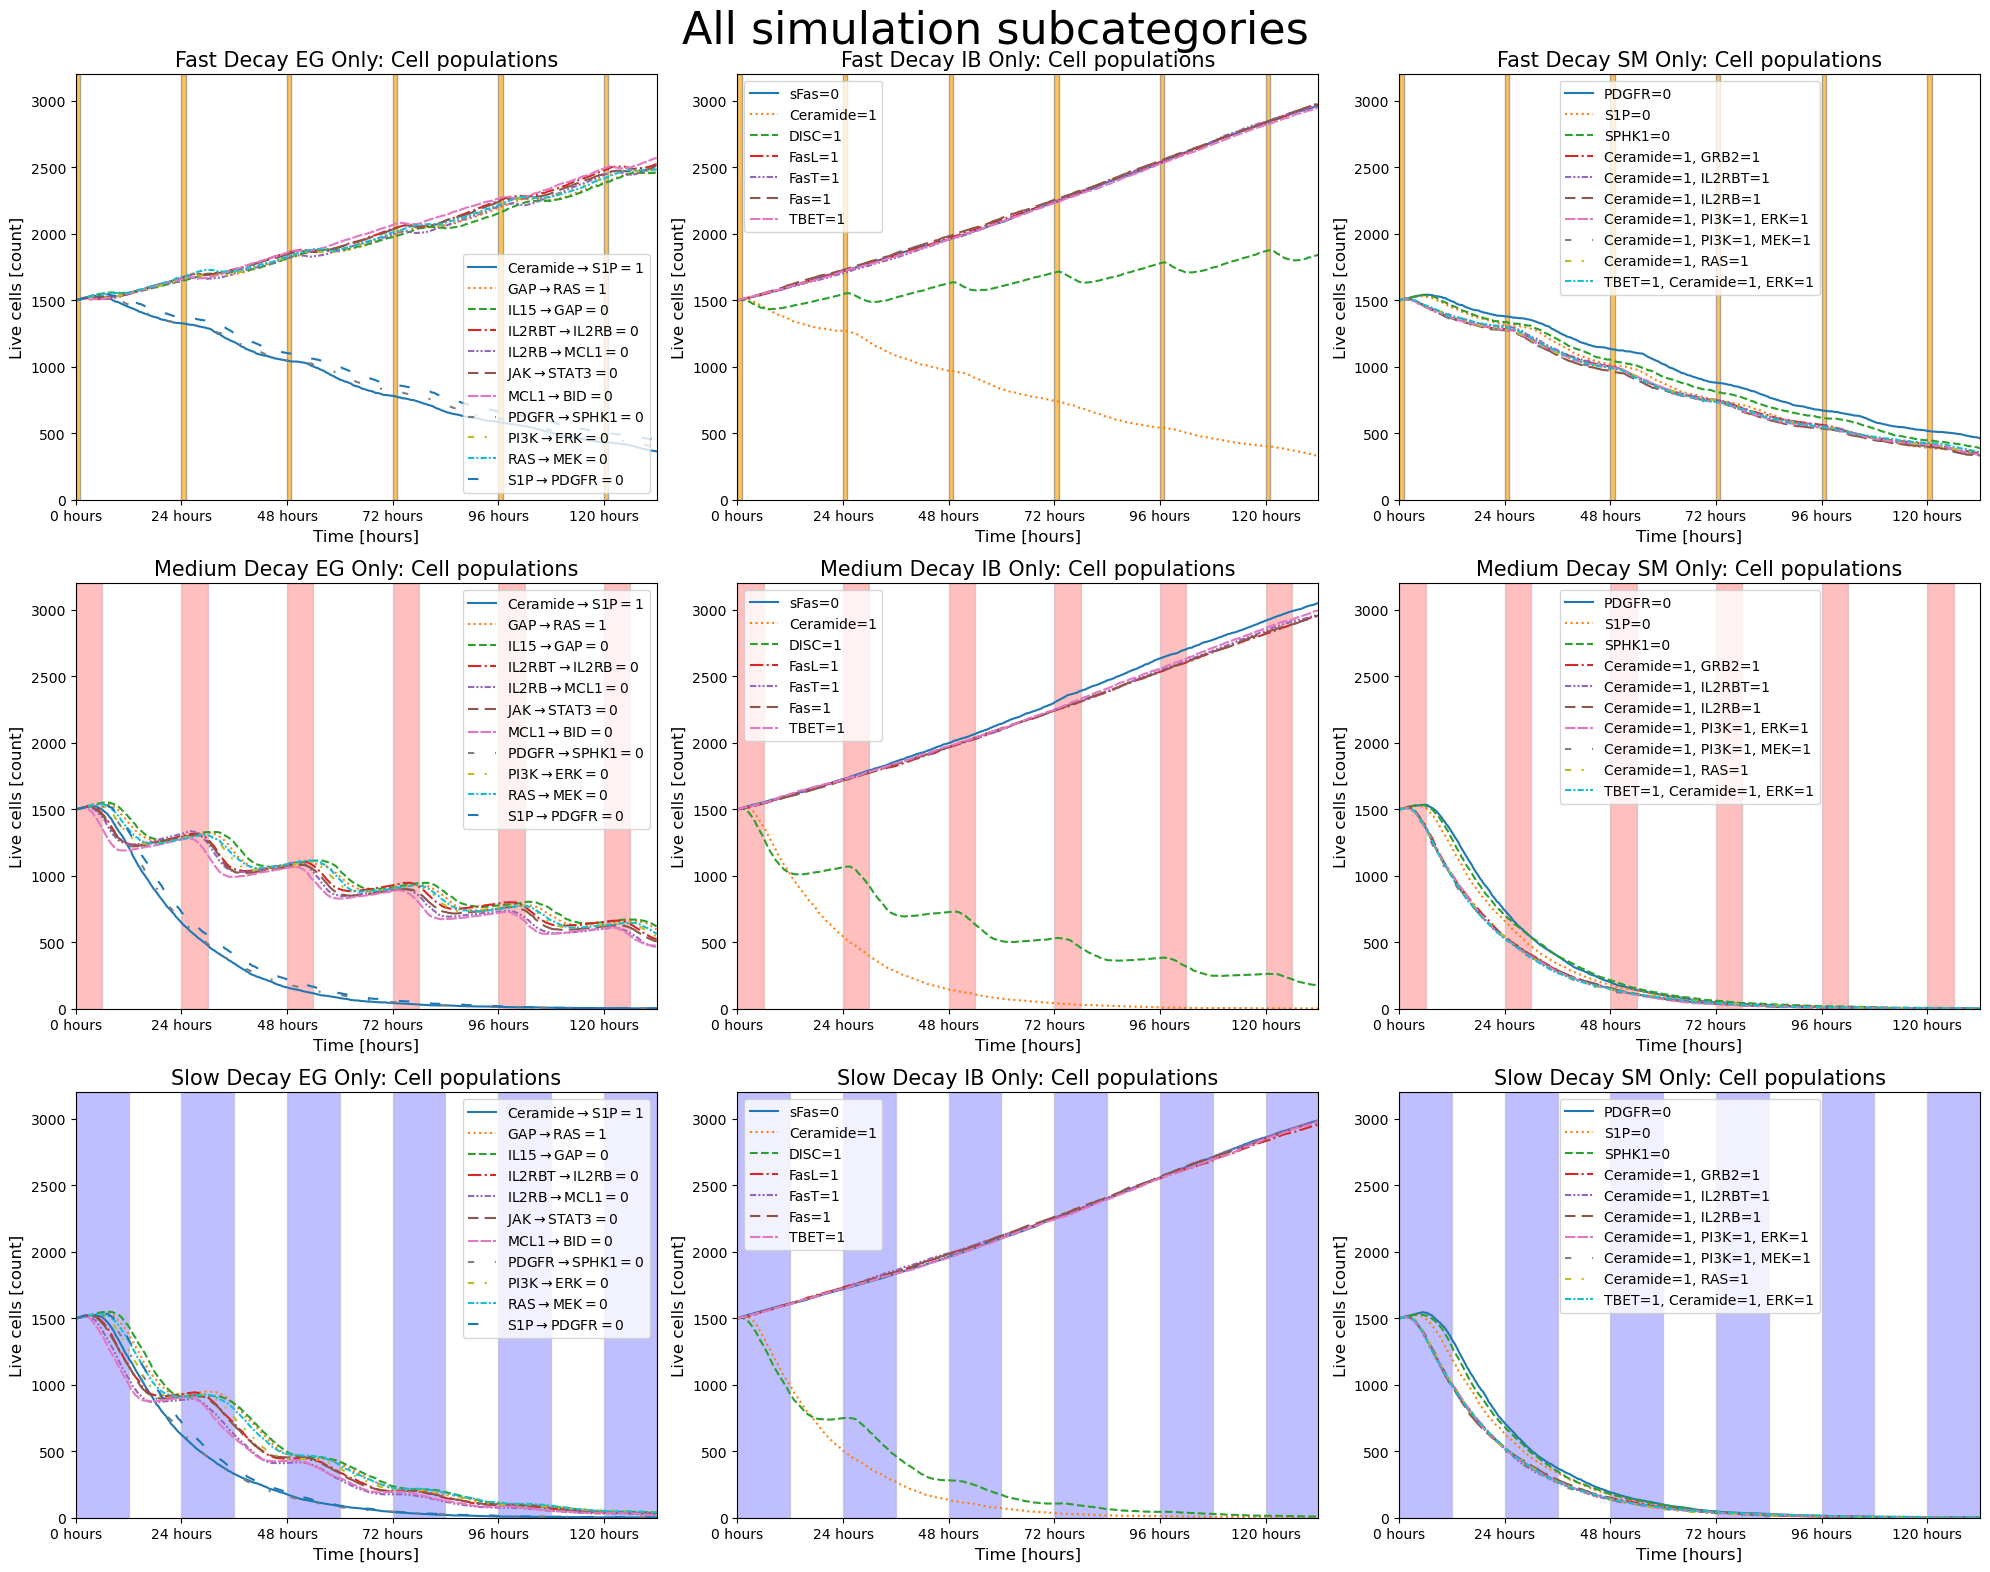

In [112]:
fig, axes = plt.subplots(3, 3, figsize=(20, 16))

for category_name, ax in zip(individual_categories, axes.ravel(order='F')):    
    ax = plot_category_array(category_name, individual_categories[category_name], df_avg, ax)

fig.suptitle('All simulation subcategories', fontsize=32)
plt.tight_layout()
plt.savefig('../figures/all_simulation_subcategories.png', dpi=600)
plt.show()

### Conclusion

We  can see that in the left column (the egdetic perturbations), that some interventions succeed at the higest rate of decay (least exposure): Ceramide_S1P_1, S1P_PDGRF_0, and PDGRF_SPHK1_0. However, the others fail to control the population at this lower exposure. 

However, in both the target control simulation and in the MaBoSS analysis (see other notebooks), all are predicted to have control. 

Of the IBMFA-derived apoptosis interventions, we note that only the pro_Ceramide and pro_DISC interventions succeed (pro_DISC controls population at higher exposures). Of note, the MaBoSS analysis comports with this PhysiBoSS analysis - that only pro_DISC and pro_Ceramid would succeed. 

## Make more compact charts

Lets focus on the only the fast and slow decays. And we will combine the node interventions into one chart. And remove the redundant ceramide ones (ceramide by it self produces apoptosis - so all the interventions with multiple nodes + ceramide just work - without the other nodes.)

Get the correct focused categories - only the slow and fast decays, putting node interventions together, and removing the redundant ceramide interventions. 

Removing the ceramide ones will be the trick. Just do it manually???

I need to take EVERYTHING in the SM category that contains ceramide out. 

In [113]:
focused_categories = {}

# make new dataframes for SM category that removes any intervnetion that contains Ceramide

df_fast_SM_no_ceramide = pd.DataFrame()
for column in df_fast_SM.columns:
    if 'Ceramide' not in column:
        df_fast_SM_no_ceramide[column] = df_fast_SM[column]

df_slow_SM_no_ceramide = pd.DataFrame()
for column in df_slow_SM.columns:
    if 'Ceramide' not in column:
        df_slow_SM_no_ceramide[column] = df_slow_SM[column]

# make the focused dataframes and dictionary.

df_fast_nodal = pd.concat([df_fast_IB, df_fast_SM_no_ceramide], axis=1)
df_slow_nodal = pd.concat([df_slow_IB, df_slow_SM_no_ceramide], axis=1)

focused_categories = {'df_Fast_EG': df_fast_EG, 'df_Slow_EG': df_slow_EG, 'df_Fast_nodal': df_fast_nodal, 'df_Slow_nodal': df_slow_nodal}

Make new function to plot these specific tracks

In [114]:
def plot_category_array_focused(df_name: str, df, df_avg, ax, subplot_title):
    split_category_name = df_name.split('_')
    # title = f'{split_category_name[1]} Decay {split_category_name[2]} Only: Cell populations'
    title = subplot_title
    # fig, ax = plt.subplots(figsize=(8, 6))
    linestyles = ['solid', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1, 1, 1)), (5, (10, 3)), (0, (5, 1)), (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)), (0, (3, 1, 1, 1)), (0, (5, 10))] 
    for i, intervention in enumerate(df): 
        ax.plot(df_avg.index, df_avg[intervention], label=df[intervention]['intervention_name'], linestyle=linestyles[i]) 

    ax.set_title(title, fontsize=15)
    ax.set_xlabel('Time [hours]', fontsize=12)
    ax.set_ylabel('Live cells [count]', fontsize=12)
    ax.set_xlim(0, df_avg.index[-1])
    ax.set_ylim(0, 3200)
    ticks = np.arange(0, len(df_avg.index), 120)
    # ax.set_xticks(ticks, rotation=45, fontsize=10)
    ax.set_xticks(ticks, minor=False)
    # ax.set_yticks(fontsize=10)

    # Use set_major_formatter to format ticks as hours

    def fmt_index_to_hours(x, pos):
        x = x * 12/60 # 12 minutes per index
        return f'{x:.0f}'
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))

    # put these in a loop to color code the different time periods - every 24 hours.
    for tick in ticks:
        if split_category_name[1] == 'Fast':
            ax.axvspan(tick, tick+5, facecolor='orange', alpha=0.66, edgecolor='grey', linewidth=1)
        elif split_category_name[1] == 'Medium':
            ax.axvspan(tick, tick+30, facecolor='red', alpha=0.25, edgecolor='grey', linewidth=1)
        elif split_category_name[1] == 'Slow':
            ax.axvspan(tick, tick+60, facecolor='blue', alpha=0.25, edgecolor='grey', linewidth=1)

    ax.legend(fontsize=12, ncol=2)
    # plt.tight_layout()
    # plt.show()
    return ax

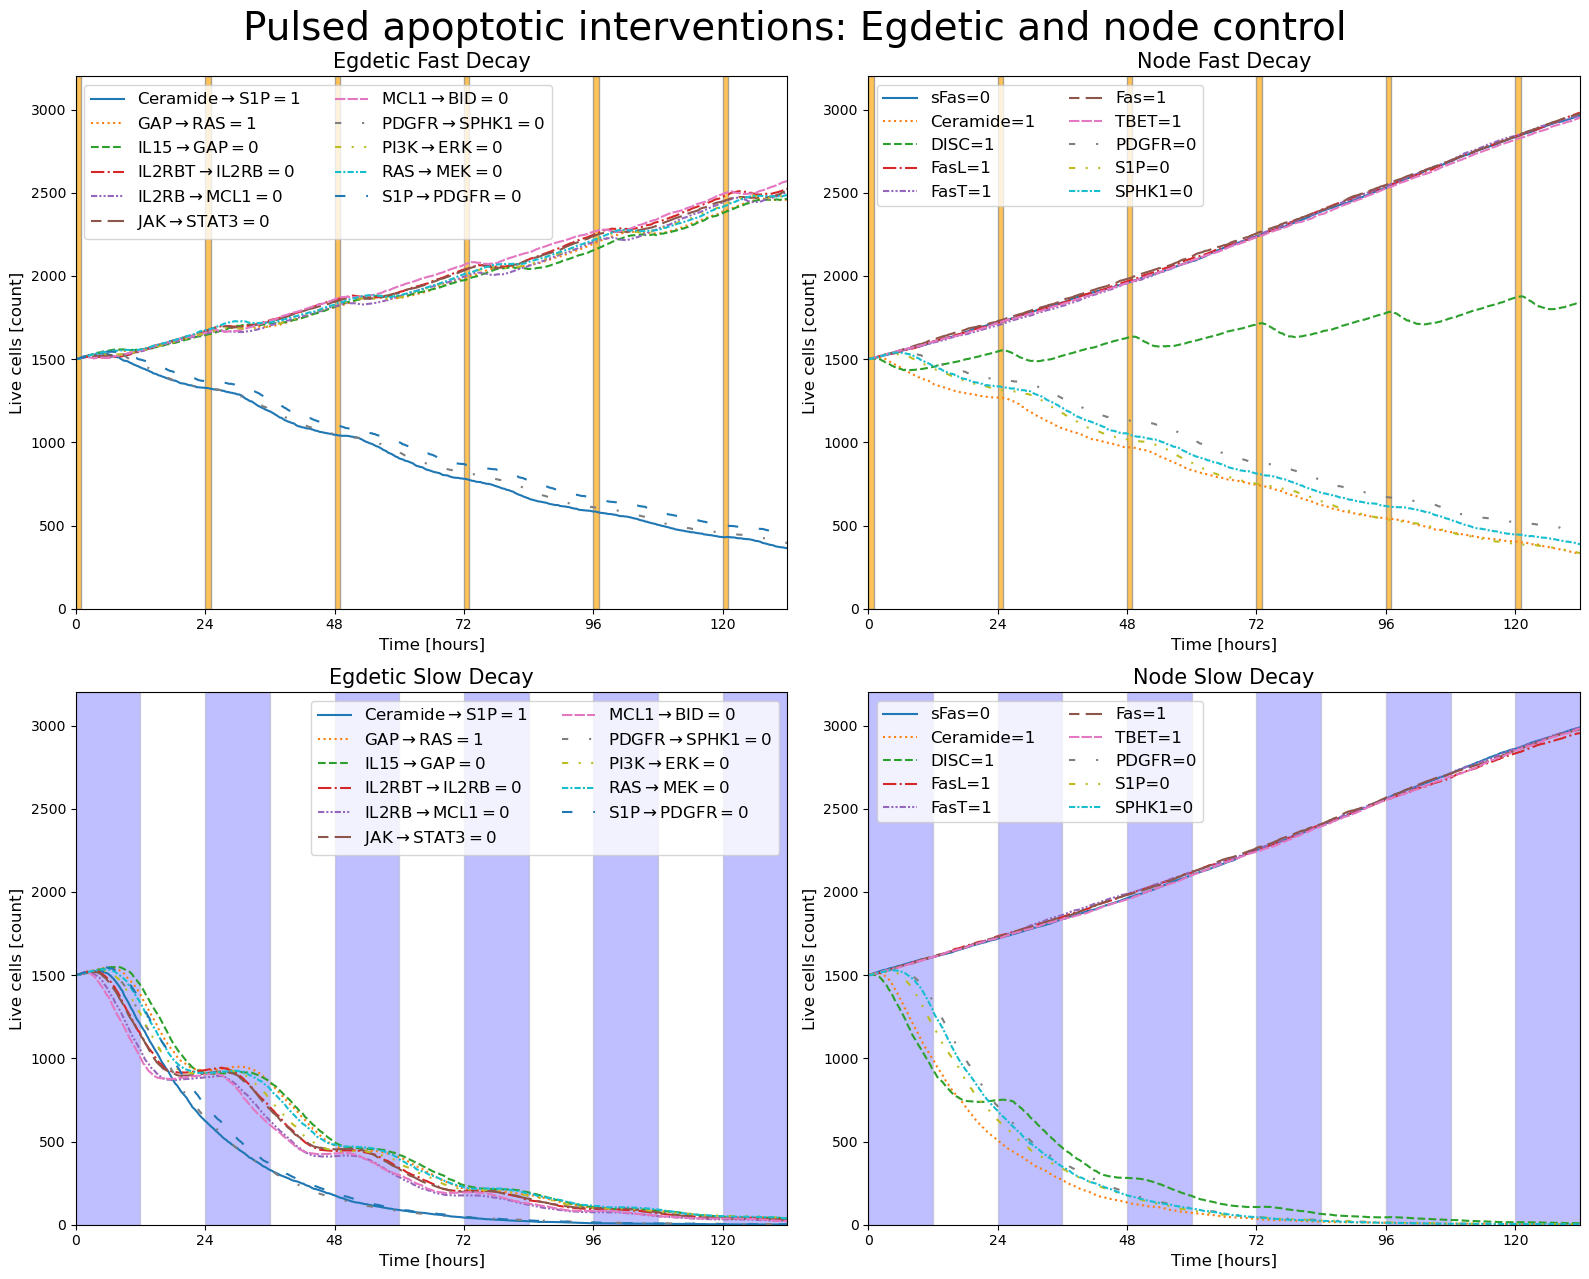

In [115]:
fig, axes = plt.subplots(2, 2, figsize=(16, 13))

subplot_titles = ['Egdetic Fast Decay', 'Egdetic Slow Decay', 'Node Fast Decay', 'Node Slow Decay']

for category_name, ax, subplot_title in zip(focused_categories, axes.ravel(order='F'), subplot_titles):    
    ax = plot_category_array_focused(category_name, focused_categories[category_name], df_avg, ax, subplot_title)

fig.suptitle('Pulsed apoptotic interventions: Egdetic and node control', fontsize=28)
plt.tight_layout()
plt.savefig('../figures/pulsed_edge_and_node_controls.png', dpi=600)
plt.show()

## Area undercurve and intervention speed

We are interested in ranking the interventions. We will get the AUC (total cell count) for the mean of each intervention and a meausre of how quickly the intervention acts to decrease population size. 

We already know that the pulse width will impact this - so lets split by pulse width. The AUC rankings _should_ be highly correlated. The timing-based measure shouldn't be (will test later).

The fast decay has many that fail to control the population - we aren't trying to charaterize those rankings. Furthremore, we already know that many of the IB predictions fail - so we remove those also. 



In [28]:
# add in the total cell count to the rankings dataframe

thershold = 1275 # 85% of initial cell pouplation of 1500

for column in df_avg.columns:
    df_categories.loc[column, 'total_cell_count'] = df_avg[column].sum()
    time_half_population = df_avg.clip(lower=thershold)[column].idxmin()
    df_categories.loc[column, 'time_to_85'] = time_half_population

df_categories['total_cell_count'] = df_categories['total_cell_count'].astype(float)
df_categories['time_to_85'] = df_categories['time_to_85'].astype(float)
df_categories


,intervention_name,algorithm,decay,total_cell_count,time_to_85
EG_Ceramide_S1P_1_1,Ceramide->S1P=1,EG,1,5.920697e+05,1872.0
EG_Ceramide_S1P_1_2,Ceramide->S1P=1,EG,2,1.993470e+05,672.0
EG_Ceramide_S1P_1_3,Ceramide->S1P=1,EG,3,1.982107e+05,648.0
EG_GAP_RAS_1_1,GAP->RAS=1,EG,1,1.292579e+06,0.0
EG_GAP_RAS_1_2,GAP->RAS=1,EG,2,6.527747e+05,1008.0
...,...,...,...,...,...
SM_pro_Ceramidepro_RAS_2,"Ceramide=1, RAS=1",SM,2,1.756813e+05,456.0
SM_pro_Ceramidepro_RAS_3,"Ceramide=1, RAS=1",SM,3,1.715710e+05,456.0
SM_pro_TBETpro_Ceramidepro_ERK_1,"TBET=1, Ceramide=1, ERK=1",SM,1,5.622663e+05,1608.0
SM_pro_TBETpro_Ceramidepro_ERK_2,"TBET=1, Ceramide=1, ERK=1",SM,2,1.736117e+05,444.0


In [29]:
df_categories['total_cell_count'].sort_values(ascending=False).head(15)

IB_anti_sFas_2    1.485069e+06
IB_pro_FasT_3     1.463189e+06
IB_pro_Fas_3      1.462181e+06
IB_pro_TBET_2     1.460760e+06
IB_pro_Fas_1      1.458542e+06
IB_anti_sFas_3    1.457730e+06
IB_pro_FasL_3     1.457549e+06
IB_pro_FasT_2     1.453625e+06
IB_pro_TBET_3     1.453441e+06
IB_pro_FasL_1     1.452751e+06
IB_pro_Fas_2      1.450136e+06
IB_anti_sFas_1    1.449877e+06
IB_pro_FasT_1     1.449469e+06
IB_pro_FasL_2     1.448488e+06
IB_pro_TBET_1     1.444803e+06
Name: total_cell_count, dtype: float64

In [30]:
# Now we split off the interventions by decay rate

df_fast_decay_ranking = df_categories[df_categories.decay == '1']

# df_medium_decay_ranking = df_categories.query('decay == 2')
df_medium_decay_ranking = df_categories[df_categories.decay == '2']
df_medium_decay_ranking = df_medium_decay_ranking[df_medium_decay_ranking['total_cell_count']<1E6]

df_slow_decay_ranking = df_categories[df_categories.decay == '3']
df_slow_decay_ranking = df_slow_decay_ranking[df_slow_decay_ranking['total_cell_count']<1E6]

df_slow_decay_ranking.shape

(23, 5)

Now - the ranking!

In [31]:
# this generates a warning and won't work (I think) with Pandas 3.0. I tried to follow the example provided in the documentation - and am still getting the warning. I am not sure what is wrong.

# fast
# cell_count_rank = rankdata(df_fast_decay_ranking['total_cell_count'])
# df_fast_decay_ranking.loc[:, ('cell_count_rank')] = cell_count_rank
# df_fast_decay_ranking.to_csv('../dataframes/fast_decay_time_ranking.csv')

# medium
cell_count_rank = rankdata(df_medium_decay_ranking['total_cell_count'])
df_medium_decay_ranking.loc[:, 'cell_count_rank'] = cell_count_rank
time_rank = rankdata(df_medium_decay_ranking['time_to_85'])
df_medium_decay_ranking.loc[:, 'time_rank'] = time_rank
df_medium_decay_ranking.to_csv('../dataframes/medium_decay_time_ranking.csv')

# slow
cell_count_rank = rankdata(df_slow_decay_ranking['total_cell_count'])
df_slow_decay_ranking.loc[:, 'cell_count_rank'] = cell_count_rank
time_rank = rankdata(df_slow_decay_ranking['time_to_85'])
df_slow_decay_ranking.loc[:, 'time_rank'] = time_rank
df_slow_decay_ranking.to_csv('../dataframes/slow_decay_time_ranking.csv')

In [32]:
# df_fast_decay_ranking.sort_values(by='cell_count_rank', ascending=False)

In [33]:
df_medium_decay_ranking.sort_values(by='cell_count_rank', ascending=False)

,intervention_name,algorithm,decay,total_cell_count,time_to_85,cell_count_rank,time_rank
EG_IL15_GAP_0_2,IL15->GAP=0,EG,2,667846.000000,1092.0,23.0,23.0
EG_GAP_RAS_1_2,GAP->RAS=1,EG,2,652774.666667,1008.0,22.0,22.0
EG_RAS_MEK_0_2,RAS->MEK=0,EG,2,644642.666667,864.0,21.0,21.0
EG_PI3K_ERK_0_2,PI3K->ERK=0,EG,2,638882.000000,792.0,20.0,19.5
EG_IL2RBT_IL2RB_0_2,IL2RBT->IL2RB=0,EG,2,633734.666667,612.0,19.0,12.5
EG_JAK_STAT3_0_2,JAK->STAT3=0,EG,2,616733.000000,612.0,18.0,12.5
EG_IL2RB_MCL1_0_2,IL2RB->MCL1=0,EG,2,609459.333333,576.0,17.0,11.0
EG_MCL1_BID_0_2,MCL1->BID=0,EG,2,590396.333333,444.0,16.0,5.0
IB_pro_DISC_2,DISC=1,IB,2,402200.000000,372.0,15.0,1.0
EG_S1P_PDGFR_0_2,S1P->PDGFR=0,EG,2,223073.333333,780.0,14.0,18.0


In [34]:
df_slow_decay_ranking.sort_values(by='cell_count_rank', ascending=False)

,intervention_name,algorithm,decay,total_cell_count,time_to_85,cell_count_rank,time_rank
EG_IL15_GAP_0_3,IL15->GAP=0,EG,3,335035.666667,900.0,23.0,23.0
EG_GAP_RAS_1_3,GAP->RAS=1,EG,3,328134.333333,828.0,22.0,22.0
EG_RAS_MEK_0_3,RAS->MEK=0,EG,3,324240.333333,780.0,21.0,19.0
EG_PI3K_ERK_0_3,PI3K->ERK=0,EG,3,311285.000000,720.0,20.0,17.0
EG_IL2RBT_IL2RB_0_3,IL2RBT->IL2RB=0,EG,3,297035.333333,588.0,19.0,13.0
EG_JAK_STAT3_0_3,JAK->STAT3=0,EG,3,295012.666667,576.0,18.0,12.0
EG_IL2RB_MCL1_0_3,IL2RB->MCL1=0,EG,3,271671.000000,504.0,17.0,11.0
EG_MCL1_BID_0_3,MCL1->BID=0,EG,3,271363.333333,456.0,16.0,7.5
IB_pro_DISC_3,DISC=1,IB,3,217176.333333,372.0,15.0,1.0
SM_anti_PDGFR_3,PDGFR=0,SM,3,215920.666667,792.0,14.0,20.5


Lets doulbe check that we do have a correlation between these. 

In [35]:
# res = stats.spearmanr(df_fast_decay_ranking.loc[:, ('cell_count_rank')], df_medium_decay_ranking.loc[:, ('cell_count_rank')])

# print(res)

In [36]:
# res = stats.spearmanr(df_fast_decay_ranking.loc[:, ('cell_count_rank')], df_slow_decay_ranking.loc[:, ('cell_count_rank')])

# print(res)

In [37]:
res = stats.spearmanr(df_medium_decay_ranking.loc[:, ('cell_count_rank')], df_slow_decay_ranking.loc[:, ('cell_count_rank')])

print(res)

SpearmanrResult(correlation=0.9683794466403162, pvalue=3.8565010642989665e-14)


As expected, they are highly correlated. 